# Endüstriyel Mobil Kablosuz Ağların Optimum Kapsama Alanı için Anahtar Düğümlerin Verimli Dağıtımı 

Endüstriyel mobil kablosuz ağlar, fabrikalar, depolar ve benzeri işletmelerde kablosuz haberleşme için kullanılan ağlardır. Bu ağların optimum kapsama alanını sağlamak için anahtar düğümlerin doğru bir şekilde dağıtılması önemlidir.
Anahtar düğümler, ağda haberleşme için kullanılan cihazlardır ve bu cihazların optimum bir şekilde dağıtılması, ağın kapsama alanının artırılmasını ve daha iyi bir performans sağlanmasını mümkün kılar. Anahtar düğümlerin dağılımı, ağın büyüklüğüne, coğrafi koşullarına ve diğer faktörlere göre değişebilir.


# Gerekli kütüphaneleri import edilmesi

In [120]:
import numpy as np
import matplotlib.pyplot as plt

Endüstriyel mobil kablosuz ağların kapsama alanını optimize etmek için Monte Carlo yöntemini kullanılabilir. 
Bu yöntem, birçok rastgele koordinat üreterek, düğümleri bu koordinatlara dağıtarak kapsama alanını en iyi şekilde elde etmeyi amaçlar.
Numpy, rastgele koordinat üretmek ve düğümleri bu koordinatlara dağıtmak için kullanılabilir.

In [121]:
class Node:
  def __init__(self, coord, range=1):
    self.coord = coord
    self.range = range
# Monte Carlo yöntemini kullanarak rastgele koordinatlar üret
coords = np.random.random((100, 2))

# Düğümleri bu koordinatlara dağıt
nodes = [Node(coord) for coord in coords]

Öncelikle metodun giriş parametresi olarak verilen düğümlerin koordinatlarını bir diziye alır.
Daha sonra bu koordinatları kullanarak bir scatter plot oluşturur. Scatter plot, koordinatları nokta olarak gösteren bir grafik türüdür ve matplotlib kütüphanesinde yer alır.

In [122]:
def calculate_coverage(nodes):
  coords = [node.coord for node in nodes]  
  plt.scatter(coords[0], coords[1]) 
  #scatter plot üzerinde, düğümlerin birbirlerine olan mesafelerini hesaplayarak çemberler çizilir. 
  #Her düğüm için bir çember çizilerek, düğümlerin kapsama alanı belirlenebilir

  for node in nodes:
    circle = plt.Circle(node.coord, node.range, color='r', fill=False)
    plt.gca().add_artist(circle)
  #scatter plot üzerinde, düğümlerin kapsama alanlarının birleşimini hesaplayarak bir poligon oluşturulur.
  # Bu poligon, düğümlerin oluşturduğu kapsama alanını gösterir
  x, y = zip(*coords)
  plt.fill(x, y, color='r', alpha=0.5)


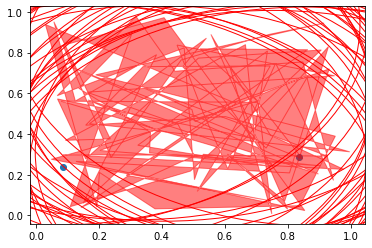

In [123]:
coverage = calculate_coverage(nodes)

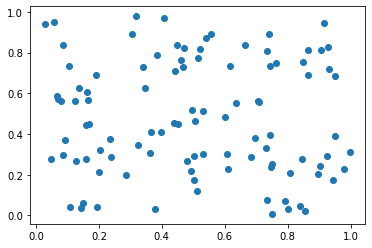

In [124]:
# Sonuçları grafik olarak görselleştir
plt.scatter(coords[:, 0], coords[:, 1], c=coverage)
plt.show()

Bu proje, rastgele 100 adet koordinat üretir, bu koordinatlara düğümler dağıtır ve sonuçları grafik olarak görselleştirir.

#### DTSMC 

DTSMC, bir grafik ve tabu listesi kullanarak maksimum klik boyutunu bulmaya çalışır. 
Algoritma, her düğümü bir kez ziyaret ederek başlar ve her ziyaret ettiği düğümü tabu listesine ekler. 
Her ziyaret ettiği düğümün komşularından biri de ziyaret edilmemişse, o düğümü ziyaret eder ve tabu listesine ekler. 
Bu işlemi tüm düğümler için tekrarlar ve bittiğinde tabu listesinde bulunan düğümlerin oluşturduğu klik boyutunu döndürür.

In [125]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.edges = edges
        self.adj_list = self._build_adj_list()
        
    def _build_adj_list(self):
        adj_list = {i: [] for i in range(self.num_nodes)}
        for edge in self.edges:
            adj_list[edge[0]].append(edge[1])
            adj_list[edge[1]].append(edge[0])
        return adj_list
    
    def neighbors(self, node):
        return self.adj_list[node]
    
    def degree(self, node):
        return len(self.adj_list[node])



def dtsmc(graph, tabu_list):
    max_clique_size = 0
    for node in range(graph.num_nodes):
        if node in tabu_list:
            continue
        
        tabu_list.append(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in tabu_list:
                dtsmc(graph, tabu_list)
        max_clique_size = max(max_clique_size, len(tabu_list))
        tabu_list.pop()
    return max_clique_size



In [126]:
num_nodes = 4
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
graph = Graph(num_nodes, edges)
tabu_list = []
max_clique_size = dtsmc(graph, tabu_list)
print("Max Clique Size", max_clique_size)
print("Number of nodes:", graph.num_nodes)
print("Edges:", graph.edges)


Max Clique Size 1
Number of nodes: 4
Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [127]:
# Düğüm sınıfını tanımla
class Node:
  def __init__(self, coord):
    # Düğümün koordinatlarını saklar
    self.coord = coord
    # Koordinat değerlerini x ve y değişkenlerine ayırır
    self.x, self.y = coord
node1 = Node(coord=(0, 0))
node2 = Node(coord=(1, 0))
node3 = Node(coord=(1, 1))

# Düğümleri bir düğüm grubuna ekleyin
clique = [node1, node2, node3]

In [128]:
def calculate_delay(node1, node2):
  # Düğümlerin koordinatlarını kullanarak iletişim gecikmesini hesaplar
  delay = abs(node1.coord[0] - node2.coord[0]) + abs(node1.coord[1] - node2.coord[1])
  
  # İletişim gecikmesini geri döndürür
  return delay


In [129]:
def calculate_energy(node1, node2):
  # İki düğüm arasındaki mesafeyi hesaplanır
  distance = calculate_distance(node1, node2)
  
  # İki düğüm arasındaki iletişim hızını hesaplanır
  data_rate = calculate_data_rate(node1, node2)
  
  # İki düğüm arasındaki enerji tüketimini hesaplayın ve geri döndürülür
  energy = distance * data_rate
  return energy


In [130]:
def calculate_distance(node1, node2):
  x1, y1 = node1.x, node1.y
  x2, y2 = node2.x, node2.y
  
  distance = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
  return distance


In [131]:
# Örnek koordinat bilgisi
coord = (10, 20)


In [132]:
import math
# Örnek düğüm nesneleri
node1 = Node(coord)
node2 = Node(coord)

node1.x = 10
node2.x = 20

node1.y = coord[1]
node2.y = coord[1]
node.x = coord[0]


In [133]:
def calculate_data_rate(node1, node2):
  # İki düğümün koordinatlarını alır.
  x1, y1 = node1.x, node1.y
  x2, y2 = node2.x, node2.y
  
  # İki düğüm arasındaki mesafeyi hesaplanır.
  distance = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
  
  # İki düğüm arasındaki iletişim hızını hesaplayın ve geri döndürür.
  data_rate = (1 / distance) * 10**6
  return data_rate


In [134]:
# Düğümler oluşturulur
node1 = Node((1, 2))
node2 = Node((3, 4))
node3 = Node((5, 6))
node4 = Node((7, 8))


In [135]:
def calculate_performance(clique):
  max_delay = 0
  max_energy = 0
  for node1 in clique:
    for node2 in clique:
      if node1 != node2:
        delay = calculate_delay(node1, node2)
        max_delay = max(max_delay, delay)
        
        energy = calculate_energy(node1, node2)
        max_energy = max(max_energy, energy)
        
  return max_delay, max_energy

clique = [node1, node2, node3, node4]
max_delay, max_energy = calculate_performance(clique)
print("Max Delay ", max_delay)
print("Max Energy ",max_energy)

Max Delay  12
Max Energy  1000000.0


İsa KULAKSIZ - 20140201052